## Face detection
The goal of this notebook is to produce ads statistics related to images and faces in the set of ads provided for the CP1 during the MEMEX Winter QPR 2017.

### Inputs
1. train_images_faces_stats.jl
1. test_images_faces_stats.jl
2. train_adjusted.json
4. test_adjusted_unlabeled.json

### Outputs
1. train_cluster_images_faces_stats.tsv
2. test_cluster_images_faces_stats.tsv

Each line is in format:

    key \t values \t label

key is 'cluster_id'

values are:
- 'faces_min_min' as the minimum number of faces detected in any image of any ad of this cluster
- 'faces_min_max' as the maximum of minimum number of faces detected in any image of each ad of this cluster
- 'faces_min_median' as the median of minimum number of faces detected in any image of each ad of this cluster
- 'faces_max_min' as the minimum of the maximum number of faces detected in any image of each ad of this cluster
- 'faces_max_max' as the maximum number of faces detected in any image of any ad of this cluster
- 'faces_max_median' as the median of the maximum number of faces detected in any image of each ad of this cluster
- 'faces_median_min' as the minimum of the median number of faces detected in any image of each ad of this cluster
- 'faces_median_max' as the maximum number of the median number faces detected in any image of any ad of this cluster
- 'faces_median_median' as the median of the median number of faces detected in any image of each ad of this cluster
- 'faces_count_min' as the mininum of total number of faces detected in all images of each ad of this cluster
- 'faces_count_max' as the max number of faces detected in all images of each ad of this cluster
- 'faces_count_median' as the median number of faces detected in all images of each ad of this cluster
- 'faces_count_total' as the total number of faces detected in all images of all ads of this cluster
- 'faces_count_avg' as the average number of faces detected in all images per ad of this cluster
- 'image_count_min' as the minimum number of images url (even if not acessible, readable) for one ad in the cluster
- 'image_count_max' as the maximum number of images url (even if not acessible, readable) for one ad in the cluster
- 'image_count_median' as the median number of images url (even if not acessible, readable) for one ad in the cluster
- 'image_count_total' as the total number of images url (even if not acessible, readable) in the cluster
- 'image_count_avg' as the average number of images url (even if not acessible, readable) per ad in the cluster
- 'number_of_ads' as the number of ads in the cluster

In [95]:
import os
# set some path parameters
input_dir = "../data/"
prefix = "train"
#prefix = "test"
if prefix=="test":
    clusters_ads_file = os.path.join(input_dir,prefix+"_adjusted_unlabeled.json")
else:
    clusters_ads_file = os.path.join(input_dir,prefix+"_adjusted.json")
stats_file = os.path.join(input_dir,prefix+"_images_faces_stats.jl")
out_file = os.path.join(input_dir,prefix+"_images_faces_stats_mayank.tsv")

In [96]:
def parse_stats(stats_file):
    all_stats = {}
    import json
    with open(stats_file,"rt") as stats_in:
        for line in stats_in:
            #print line
            line_dict = json.loads(line)
            for key in line_dict:
                all_stats[key] = line_dict[key]
            #break
    print 'Gathered stats for {} ads.'.format(len(all_stats.keys()))
    return all_stats

In [97]:
all_stats = parse_stats(stats_file)

Gathered stats for 122045 ads.


In [98]:
len(all_stats)

122045

In [99]:
def parse_clusters_ads_file(clusters_ads_file):
    clusters_ads_mapping = {}
    clusters_labels = {}
    import json
    label_key = 'annotation'
    label_true = 'VERY_RELEVANT'
    with open(clusters_ads_file, "rt") as clusters_in:
        for line in clusters_in:
            line_dict = json.loads(line)
            cluster_id = line_dict['cluster_id']
            ad_id = line_dict['_id']
            if cluster_id not in clusters_ads_mapping:
                clusters_ads_mapping[cluster_id] = [ad_id]
            else:
                clusters_ads_mapping[cluster_id].append(ad_id)
            if label_key in line_dict:
                line_label = line_dict[label_key]
                line_true_label = int(line_label == label_true)
                #print line_label,line_label == label_true,line_true_label
                if cluster_id not in clusters_labels:
                    clusters_labels[cluster_id] = line_true_label
                else:
                    if clusters_labels[cluster_id] != line_true_label:
                        print 'Inconsistent labeling for cluster {}'.format(cluster_id)
            #print clusters_labels,clusters_ads_mapping,line_dict[label_key] == label_true,line_dict[label_key]
            #break
    print 'Gathered {} clusters.'.format(len(clusters_ads_mapping))
    return clusters_ads_mapping, clusters_labels

In [100]:
clusters_ads_mapping,clusters_labels = parse_clusters_ads_file(clusters_ads_file)

Gathered 614 clusters.


In [48]:
def to_percent(y, position):
    import matplotlib
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

In [52]:
def print_stats(np_img_count, nb_bins=100):
    import matplotlib
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter
    %matplotlib inline
    import numpy as np
    print np.min(np_img_count), np.mean(np_img_count), np.max(np_img_count)
    # Normed histogram seems to be broken, 
    # using weights as suggested in http://stackoverflow.com/questions/5498008/pylab-histdata-normed-1-normalization-seems-to-work-incorrect
    weights = np.ones_like(np_img_count)/float(len(np_img_count))
    res = plt.hist(np_img_count, bins=nb_bins, weights=weights)
    print np.sum(res[0])
    # Create the formatter using the function to_percent. This multiplies all the
    # default labels by 100, making them all percentages
    formatter = FuncFormatter(to_percent)

    # Set the formatter
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.show()

In [50]:
cluster_ads_count = [len(clusters_ads_mapping[x]) for x in clusters_ads_mapping]

1 296.638461538 3470
1.0


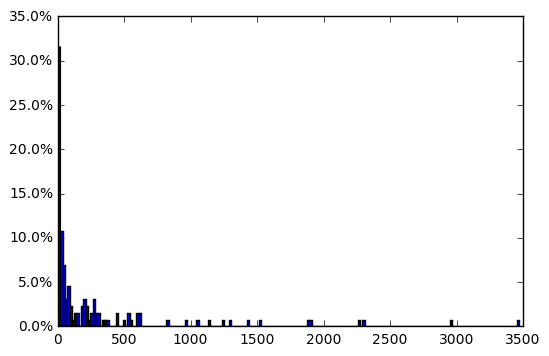

In [53]:
print_stats(cluster_ads_count, nb_bins=200)

In [54]:
print clusters_ads_mapping[clusters_ads_mapping.keys()[2]]
print all_stats[all_stats.keys()[2]]

[u'669B6059967F730B138387485594D2ADD2E2C73DD5BEC329DE79ECCBABE747A8', u'B851A24523EA86812467544B7BA6A7887D810819301E86448B2384B9B7A03405', u'523B1A63A15800E9744595C039E32A1EFAF9B25CD5C4DA255BBEEC2F83D01AAB', u'0763AF314DBB2CF4E741A235FDA878FAD838AE9F0F23E603CF63D6287B73AC26', u'3102A5DB439CEA6B0FCA01713E3E27B2A5507D5A631C982A66C0076483B318BE', u'084D7696494B937E9806A049E2823F8ECEBEEC11B13F728D724F3E2F316AEDF6', u'B8323B627FCCB5CEFB086435389CE2804A9C7CBF897764B43B76B32F4302D4C2', u'753CA1E0CC14C9000CB276BFA5A1C6849D7DEE34173DBCF1DD8B63675CD353D1', u'14D47C2F5DE5DDB3EB409B75D92A2BFB1EFF3D16E05F05DF0BB1360DB8A62416']
{u'faces_max': 1, u'faces_total': 8, u'images_count': 8, u'faces_min': 1, u'faces_median': 1}


In [86]:
# get min, max, median, total stats from count
def get_mmmt(count):
    import numpy as np
    if not count:
        count = [0]
    mi = np.min(count)
    ma = np.max(count)
    me = int(np.median(count))
    t = np.sum(count)
    return mi,ma,me,t

In [89]:
# produce output
def produce_output_mayank(clusters_ads_mapping, clusters_labels, all_stats, outfile):
    with open(outfile,"wt") as out:
        for cluster in clusters_ads_mapping:
            faces_min = []
            faces_max = []
            faces_median = []
            faces_total = []
            images_count = []
            for ad_u in clusters_ads_mapping[cluster]:
                ad = str(ad_u.strip())
                if ad not in all_stats:
                    #print 'Ad {} not in all_stats'.format(ad)
                    #print '.',
                    continue
                # compute aggrageted stats
                faces_min.append(all_stats[ad]['faces_min'])
                faces_max.append(all_stats[ad]['faces_max'])
                faces_median.append(all_stats[ad]['faces_median'])
                faces_total.append(all_stats[ad]['faces_total'])
                images_count.append(all_stats[ad]['images_count'])
            fmimi, fmima, fmime, _ = get_mmmt(faces_min)
            fmami, fmama, fmame, _ = get_mmmt(faces_max)
            fmemi, fmema, fmeme, _ = get_mmmt(faces_median)
            ftmi, ftma, ftme, ftt = get_mmmt(faces_total)
            imi, ima, ime, it = get_mmmt(images_count)
            ads_t = len(clusters_ads_mapping[cluster])
            stats = [fmimi, fmima, fmime, fmami, fmama, fmame, fmemi, fmema, fmeme, ftmi, ftma, ftme, ftt, float(ftt)/ads_t, imi, ima, ime, it, float(it)/ads_t, ads_t]
            #print stats
            #break
            out.write("{}\t{}\t{}\n".format(cluster, stats, clusters_labels[cluster]))

In [90]:
#print all_stats.keys()[0]
#print '81951EA0F273BF42552CBC73D01F4D21FCDED6ABE5D97DFA4DFEFD2B6386F418' in all_stats
produce_output_mayank(clusters_ads_mapping, clusters_labels, all_stats, out_file)